# Fidelity

In this notebook, we will try to summarize some of the substancial fidelity operations in qiskit and how to implement them

In [1]:
import numpy as np
from qiskit import QuantumCircuit, BasicAer, execute
from qiskit.circuit.library import YGate
from qiskit.quantum_info import Operator, average_gate_fidelity, process_fidelity, state_fidelity

## For gates

Fidelity can be calculated among gates through 

* `quantum_info.average_gate_fidelity`:https://qiskit.org/documentation/stubs/qiskit.quantum_info.average_gate_fidelity.html
* `quantum_info.process_fidelity`: https://qiskit.org/documentation/stubs/qiskit.quantum_info.process_fidelity.html


<div class="alert alert-block alert-success">

1.  `average_gate_fidelity`
    
It returns the average gate fidelity of a noisy quantum channel

<div>

In [2]:
#we define a operator op_a = Ygate
op_a = Operator(YGate())

# we define also op_b=np.exp(1j / 2) * op_a which is essentially op_a but with a global phase np.exp(1j / 2)
op_b = np.exp(1j / 2) * op_a

#we run the fidelity for those gates
average_gate_fidelity(op_a,op_b)

1.0

Note, in the case of unitary operators, it does not depend on global phase.

 <div class="alert alert-block alert-success">
 
 2. `quantum_info.process_fidelity`
    
 <div>

In [3]:
process_fidelity(op_a, op_b)

1.0

## For states

`quantum_info.state_fidelity`. For further infos, check on https://qiskit.org/documentation/stubs/qiskit.quantum_info.state_fidelity.html

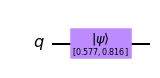

In [4]:
# same here, but now with a general state
n = 1/np.sqrt(3) 
desired_state = [n,np.sqrt(1-n**2)]

qc = QuantumCircuit(1)
qc.initialize(desired_state,0)
qc.draw('mpl')

In [5]:
# we run it with help of a simulator
back_sv = BasicAer.get_backend('statevector_simulator')
result = execute(qc, back_sv).result()
qc_sv = result.get_statevector(qc)

#Now, we run the fidelity for those states and we see they are the same 
state_fidelity(desired_state, qc_sv) 

1.0

## Also possible option:

1. `quantum_info.hellinger_fidelity`: https://qiskit.org/documentation/stubs/qiskit.quantum_info.hellinger_fidelity.html
